# Deep Learning - 2

## 2.8 Practical Example with Mnist_Fashion Dat

In [1]:
# Load mnist fashion data and split it into test and train
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

2022-05-02 21:04:26.487627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 21:04:26.487657: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Inspect data
# display shape of images and labels
import numpy as np
print("Shape of train data : ",train_images.shape)
print("Shape of train labels : ",train_labels.shape)
print("Shape of test data : ",test_images.shape)
print("Shape of test labels : ",test_labels.shape)
print("labels : ",test_labels)
print("unique labels : ",np.unique(test_labels))
print("unique labels size : ",np.unique(test_labels).size)

Shape of train data :  (60000, 28, 28)
Shape of train labels :  (60000,)
Shape of test data :  (10000, 28, 28)
Shape of test labels :  (10000,)
labels :  [9 2 1 ... 8 1 5]
unique labels :  [0 1 2 3 4 5 6 7 8 9]
unique labels size :  10


In [3]:
# create an array of labels description
import pandas as pd
labels_description = pd.Series(["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"],name="Labels Description")
print(labels_description)

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
Name: Labels Description, dtype: object


0 T-shirt/top


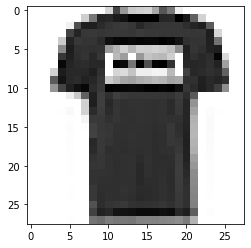

In [4]:
# display data and labels 
import matplotlib.pyplot as plt
print(train_labels[1],labels_description[train_labels[1]])
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.show()

In [5]:
# Model Creation

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(256,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(10,activation="softmax")
])

2022-05-02 21:04:29.595400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 21:04:29.596219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 21:04:29.596311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-02 21:04:29.596400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-02 21:04:29.598692: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [6]:
# Model Compilation
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
# Prepare data
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [8]:
# “Fitting” the model
model.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25


2022-05-02 21:04:29.848723: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 5s 10ms/step - loss: 0.5587 - accuracy: 0.7943
Epoch 2/25
469/469 [==============================] - 5s 10ms/step - loss: 0.3847 - accuracy: 0.8592
Epoch 3/25
469/469 [==============================] - 5s 10ms/step - loss: 0.3396 - accuracy: 0.8747
Epoch 4/25
469/469 [==============================] - 5s 10ms/step - loss: 0.3167 - accuracy: 0.8824
Epoch 5/25
469/469 [==============================] - 5s 10ms/step - loss: 0.2968 - accuracy: 0.8907
Epoch 6/25
469/469 [==============================] - 5s 10ms/step - loss: 0.2850 - accuracy: 0.8943
Epoch 7/25
469/469 [==============================] - 5s 10ms/step - loss: 0.2721 - accuracy: 0.8988
Epoch 8/25
469/469 [==============================] - 5s 10ms/step - loss: 0.2631 - accuracy: 0.9025
Epoch 9/25
469/469 [==============================] - 4s 10ms/step - loss: 0.2556 - accuracy: 0.9044
Epoch 10/25
469/469 [==============================] - 4s 10ms/step - loss: 0.2484 - accuracy: 0.9079


In [9]:
# make predictions
# first 10 images from test dataset 
# prdict based test snaps
test_snaps = test_images[0:10]
predictions = model.predict(test_snaps)

In [10]:
# display perdiction of 6th image
print("Prediction for 6th image from the data set")
predictions[5]

Prediction for 6th image from the data set


array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.6521988e-35, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [11]:
# index of the maximum probability and also the probability related to it
print("Index of higest probbability : ",predictions[5].argmax())
print("Higest probbability : ",predictions[5][predictions[5].argmax()])

Index of higest probbability :  1
Higest probbability :  1.0


Actual label : 1 Trouser
Predicted label : 1 Trouser


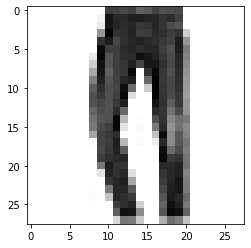

In [12]:
# print predicted data
print("Actual label :", test_labels[5],labels_description[test_labels[5]])
print("Predicted label :", predictions[5].argmax(),labels_description[predictions[5].argmax()])
check = test_snaps[5].reshape(28,28)
plt.imshow(check, cmap=plt.cm.binary)
plt.show()


In [13]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.6716 - accuracy: 0.8745
test_acc: 0.8744999766349792
test_loss: 0.6716268062591553
